# Exploratory Data Analysis: U.S. Aviation Delays Project
#### Yeshiva University DAV Math & Statistics Class - Group members: Benjamin Freund, Marlee Goodman, Eli Weiss

For our project, first looked at flight data from the Bureau of Transportation Statistics (BTS) for the US Department of Transportation. Among other flight information in its ‘TranStats’ database, there was data related to 303,748 U.S. flights from 2017 that originated from Newark, LaGuardia, and JFK airports (the three major NYC area airports). The flight data was compiled from BTS’s database into a data package by Github user Jay Lee. 

(jaleetx: github.com/jayleetx/nycflights)   


## BTS Data:

An overview of the data attributes is provided below.

| Data Set Attribute  | Description 
|:--------------------|:----------------------------------------------------------------------------- |
                                                                | 
|__Month__            |Month in which the flight occured (1 - January ... 12 - December)                      |
|__Day__      |Date on which the flight occured (1 - first day of month, 2 - second day of month,....)                                             |
|__Dep_Time/Arr_Time__   |Actual departure and arrival times (local timezone)                                    |
|__Sched_Dep_Time/Sched_Arr_Time__        |Scheduled departure and arrival times (local timezone)                                      |
|__Dep_Delay/Arr_Delay__     |Departure and arrival delays (in minutes; Negative times represent early departures/arrivals)                                |
|__Hour/Minute__         |Time of scheduled departure (broken into hour and minutes)
|__Carrier__ |Two letter carrier abbreviation                                   |
|__Flight__|Flight Number                             |
|__Origin/Dest__           |Three letter abbreviation for origin and destination airport of flight                                                  |
|__Air_Time__                |Amount of time spent in the air (in minutes)                                                             |
|__Distance__         |Distance between airports (in miles)                                                 |
|__Time_Hour__           |Scheduled date and hour of the flight combined                                               

In [67]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
import numpy as np

In [68]:
#read rda file into python
df = pd.read_csv('https://raw.githubusercontent.com/MarlaGoodman/CMS-Project/main/flights.csv')

#show partial df
df.head(2)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,10,1,27.0,2114,193.0,317.0,15,182.0,UA,1537,N54711,EWR,MIA,148.0,1085,21,14,10/1/2017 21:00
1,10,1,519.0,525,-6.0,741.0,759,-18.0,UA,1161,N37287,EWR,IAH,183.0,1400,5,25,10/1/2017 5:00


In [69]:
#checking dataset shape
df.shape

(303748, 18)

There are 18 attributes and 303,748 flight cases in the data set. 

In [70]:
#checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303748 entries, 0 to 303747
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           303748 non-null  int64  
 1   day             303748 non-null  int64  
 2   dep_time        295938 non-null  float64
 3   sched_dep_time  303748 non-null  int64  
 4   dep_delay       295934 non-null  float64
 5   arr_time        295600 non-null  float64
 6   sched_arr_time  303748 non-null  int64  
 7   arr_delay       294896 non-null  float64
 8   carrier         303748 non-null  object 
 9   flight          303748 non-null  int64  
 10  tailnum         302757 non-null  object 
 11  origin          303748 non-null  object 
 12  dest            303748 non-null  object 
 13  air_time        294896 non-null  float64
 14  distance        303748 non-null  int64  
 15  hour            303748 non-null  int64  
 16  minute          303748 non-null  int64  
 17  time_hour 

The attributes are a mix of integers, floats, and objects, with one datetime.  The number of non-null values in each attribute can be seen here as well.

In [71]:
# descriptive statistics
df.describe()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,303748.000000,303748.000000,295938.000000,303748.000000,295934.000000,295600.000000,303748.000000,294896.000000,303748.000000,294896.000000,303748.000000,303748.000000,303748.000000
mean,6.529363,15.763758,1347.336905,1346.816568,15.187424,1472.785162,1523.343986,7.104023,1698.710668,164.489427,1154.050051,13.202415,26.575118
std,3.407936,8.775245,505.989815,478.461684,52.040383,569.419935,531.782440,55.323259,1461.222263,97.872896,760.439813,4.757648,19.569856
min,1.000000,1.000000,1.000000,111.000000,-84.000000,1.000000,1.000000,-98.000000,1.000000,20.000000,93.000000,1.000000,0.000000
25%,4.000000,8.000000,905.000000,910.000000,-6.000000,1052.000000,1119.000000,-20.000000,519.000000,99.000000,636.000000,9.000000,7.000000
50%,7.000000,16.000000,1348.000000,1350.000000,-2.000000,1506.000000,1540.000000,-7.000000,1345.000000,139.000000,1005.000000,13.000000,29.000000
75%,9.000000,23.000000,1757.000000,1745.000000,12.000000,1939.000000,1954.000000,13.000000,2238.000000,211.000000,1598.000000,17.000000,45.000000
max,12.000000,31.000000,2400.000000,2359.000000,1548.000000,2400.000000,2359.000000,1589.000000,6988.000000,712.000000,4983.000000,23.000000,59.000000


According to this initial descriptive statistics, all seems to make sense. Arrival Delay and Departure Delay both have negative values to indicate being ahead of schedule. We will take a look closer at each attribute to understand them better.

### Analyzing Each Attribute Individually

#### 1. Month

In [72]:
#summary statistics
df['month'].describe()

count    303748.000000
mean          6.529363
std           3.407936
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: month, dtype: float64

It is not useful to view the summary statistics this way, as month is an ordinal but categorical variable. We will count the frequency of each month in the data set instead.

In [73]:
#count values
df['month'].value_counts()

8     27325
3     26530
7     26319
5     26089
6     25980
10    25694
4     25260
12    25098
1     24425
11    24362
9     24234
2     22432
Name: month, dtype: int64

August occurs the most in this data set, but the other months are not far behind in their frequencies. To visualize this, we will plot the frequencies. 

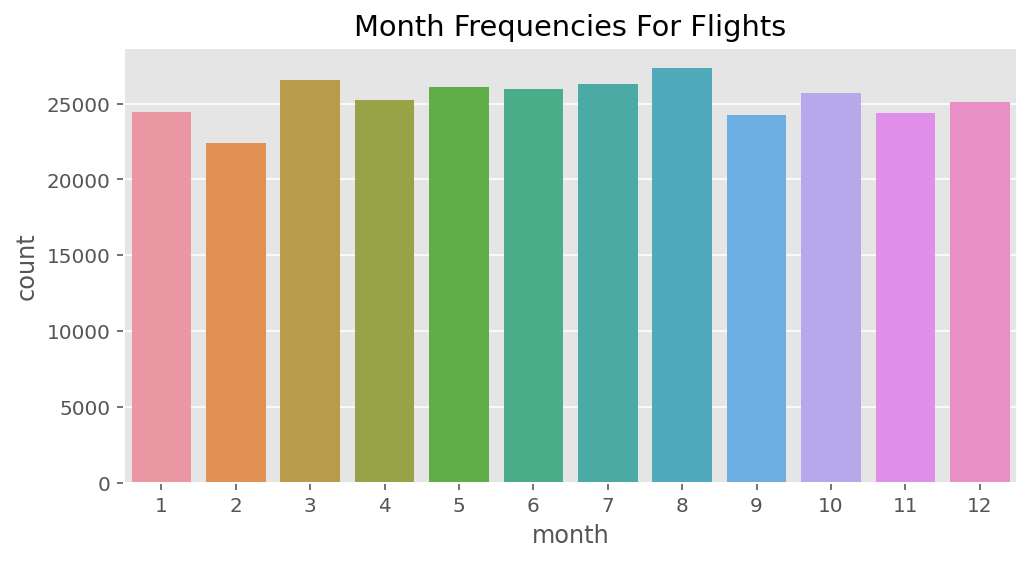

In [74]:
# count plot on the categorical variable
sns.countplot(x ='month', data = df).set_title("Month Frequencies For Flights")
 
# Show the plot
plt.show()

#### 2. Day

In [75]:
#summary statistics
df['day'].describe()

count    303748.000000
mean         15.763758
std           8.775245
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: day, dtype: float64

It is not useful to view the summary statistics this way, as day is an ordinal but categorical variable. We will count the frequency of each day and graph the results.

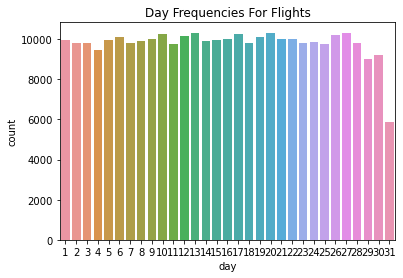

In [14]:
# count plot on the categorical variable
sns.countplot(x ='day', data = df).set_title("Day Frequencies For Flights")
 
# Show the plot
plt.show()

Every day of the month has about the same frequency, except for the 31st (which is most likely due to the fact that not every month has a 31st day). Every 7 days, the flight amounts appear to hit a high. 

#### 3. Actual Departure Time 

In [76]:
#summary statistics
df['dep_time'].describe()

count    295938.000000
mean       1347.336905
std         505.989815
min           1.000000
25%         905.000000
50%        1348.000000
75%        1757.000000
max        2400.000000
Name: dep_time, dtype: float64

There are 1,385 unique departure times. The most frequent time is 5:55 AM at 921 occurrences. 

Time is an ordinal, catergorical variable so we will use a bar graph to visualize the attribute. Because there are 1,385 unique values, we have binned them by every four hours and counted the number of occurences in each bin.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

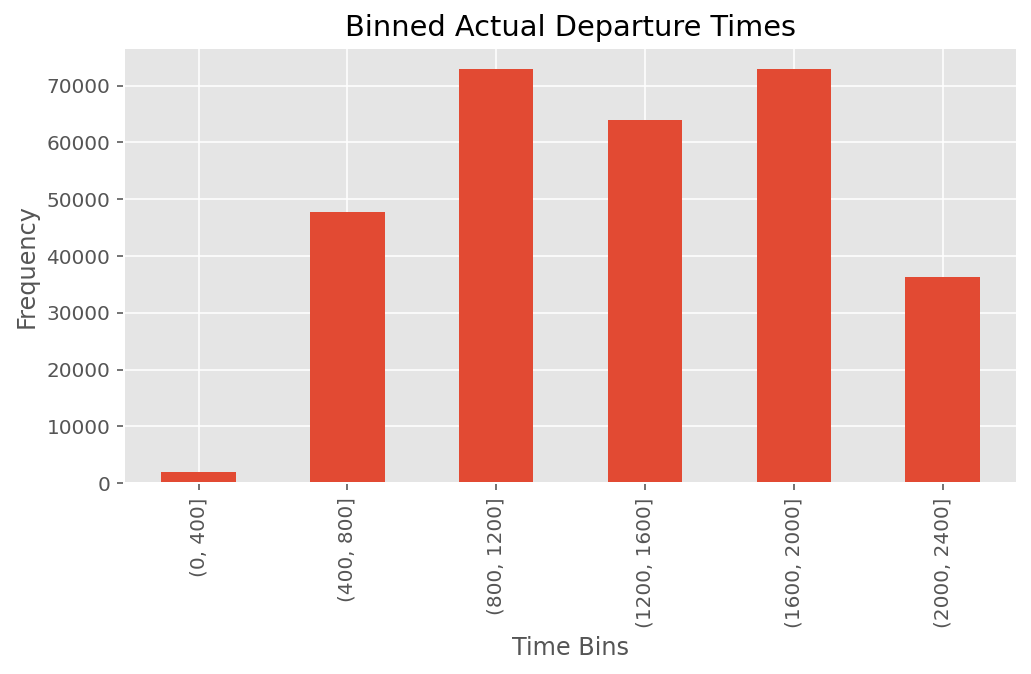

In [77]:
#create bins and value counts
bins = [0,400,800,1200,1600,2000,2400]
df['binned'] = np.searchsorted(bins, df['dep_time'].values)
binning = pd.cut(df['dep_time'], bins=bins).value_counts()
binning = df.groupby(pd.cut(df['dep_time'], bins=bins)).size()

#plot in a chart
#give it a title
binning.plot.bar(title='Binned Actual Departure Times')
#assign axis labels
plt.xlabel("Time Bins")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Most actual departure times occured between 8 AM and 8 PM. 

#### 4. Scheduled Departure Time (using the 'hour' variable)

In [78]:
#summary statistics
df['hour'].describe()

count    303748.000000
mean         13.202415
std           4.757648
min           1.000000
25%           9.000000
50%          13.000000
75%          17.000000
max          23.000000
Name: hour, dtype: float64

The minimum scheduled departure time is in the 1:00 AM hour. The maximum time in the 11:00 PM hour. 

The data type is a float but the variable 'time' is ordinal categorical, so we will count the values.

In [79]:
#count values
df['hour'].value_counts()

8     24601
7     22143
15    21536
6     20696
17    20125
9     19878
19    19824
18    19604
11    19483
16    19123
13    16779
14    16384
20    16003
12    15052
10    13226
21    11070
22     3570
5      3222
23     1425
1         4
Name: hour, dtype: int64

The most frequent scheduled departure hour is in the 8:00 AM hour at 24,601 occurences. 

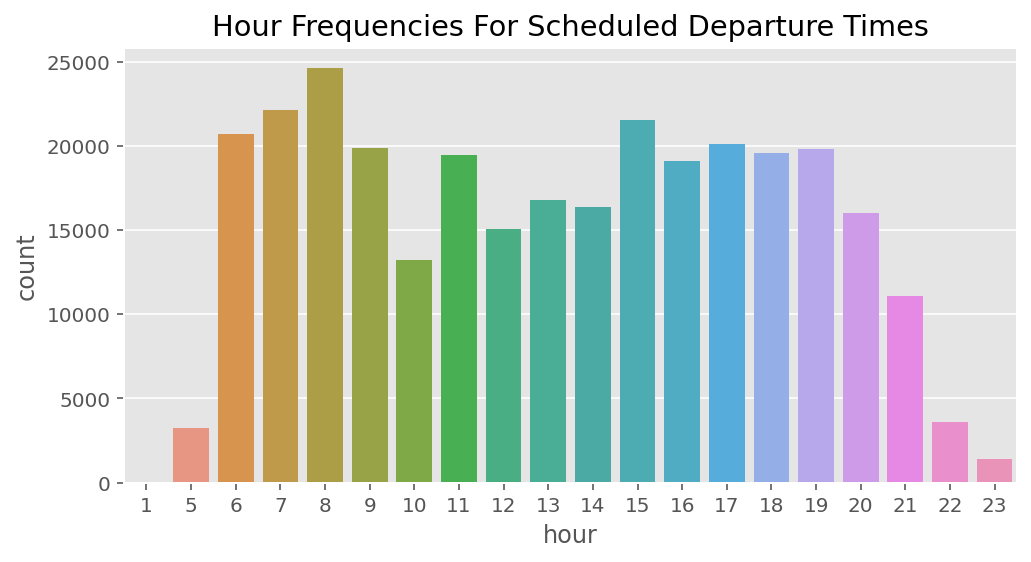

In [80]:
# count plot on the categorical variable
sns.countplot(x ='hour', data = df).set_title("Hour Frequencies For Scheduled Departure Times")
 
# Show the plot
plt.show()

Zero flights had a scheduled departure flight from 2:00 AM until 4:59 AM. 

#### 5. Actual Arrival Time

In [81]:
#summary statistics
df['arr_time'].describe()

count    295600.000000
mean       1472.785162
std         569.419935
min           1.000000
25%        1052.000000
50%        1506.000000
75%        1939.000000
max        2400.000000
Name: arr_time, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

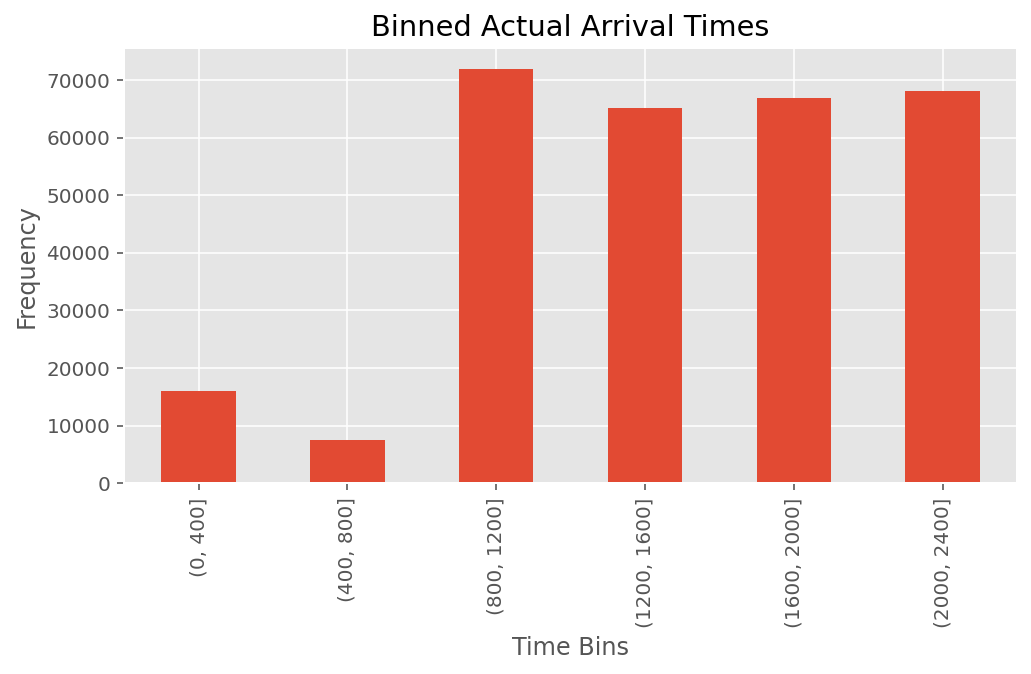

In [82]:
#create bins and value counts
bins1 = [0,400,800,1200,1600,2000,2400]
df['binned1'] = np.searchsorted(bins1, df['arr_time'].values)
binning1 = pd.cut(df['arr_time'], bins=bins1).value_counts()
binning1 = df.groupby(pd.cut(df['arr_time'], bins=bins1)).size()

#plot in a chart
#give it a title
binning1.plot.bar(title='Binned Actual Arrival Times')
#assign axis labels
plt.xlabel("Time Bins")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Actual arrival times are mostly between the hours of 8:00 AM and 11:59 PM. 

#### 6. Scheduled Arrival Time

In [83]:
#summary statistics
df['sched_arr_time'].describe()

count    303748.000000
mean       1523.343986
std         531.782440
min           1.000000
25%        1119.000000
50%        1540.000000
75%        1954.000000
max        2359.000000
Name: sched_arr_time, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

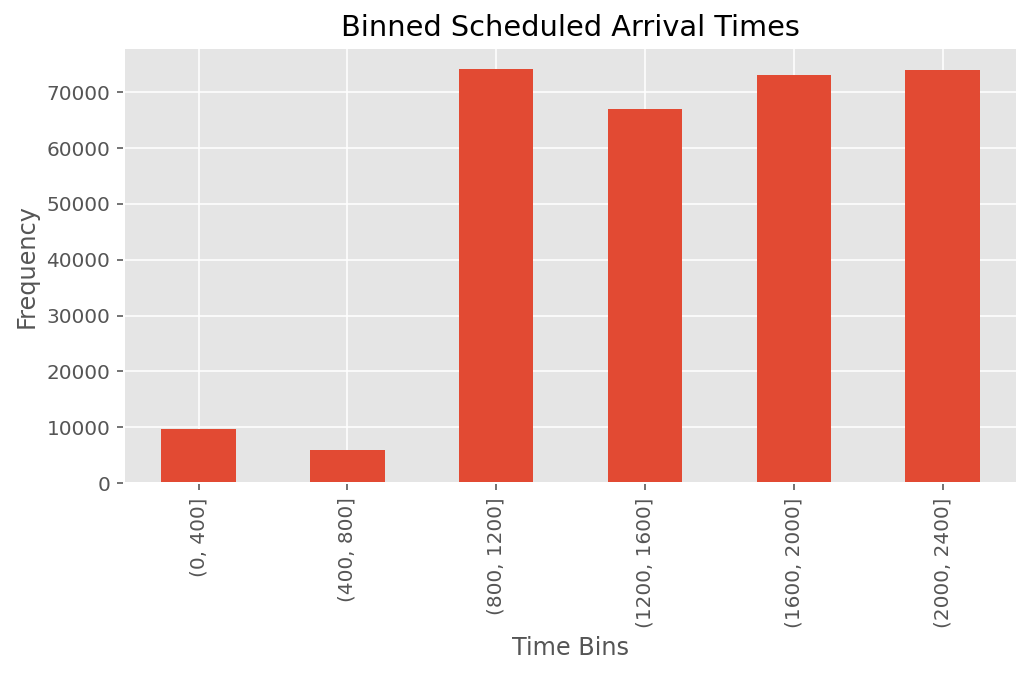

In [84]:
#create bins and value counts
bins2 = [0,400,800,1200,1600,2000,2400]
df['binned2'] = np.searchsorted(bins2, df['sched_arr_time'].values)
binning2 = pd.cut(df['sched_arr_time'], bins=bins2).value_counts()
binning2 = df.groupby(pd.cut(df['sched_arr_time'], bins=bins2)).size()

#plot in a chart
#give it a title
binning2.plot.bar(title='Binned Scheduled Arrival Times')
#assign axis labels
plt.xlabel("Time Bins")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Looks very similar to the graph for Binned Actual Arrival Times.

#### 7. Carrier

In [85]:
#summary statistics
df['carrier'].describe()

count     303748
unique        12
top           UA
freq       63406
Name: carrier, dtype: object

There are no null values in the carrier column. There are 12 unique carriers in this data set. The most frequent airline is UA at 63,406.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

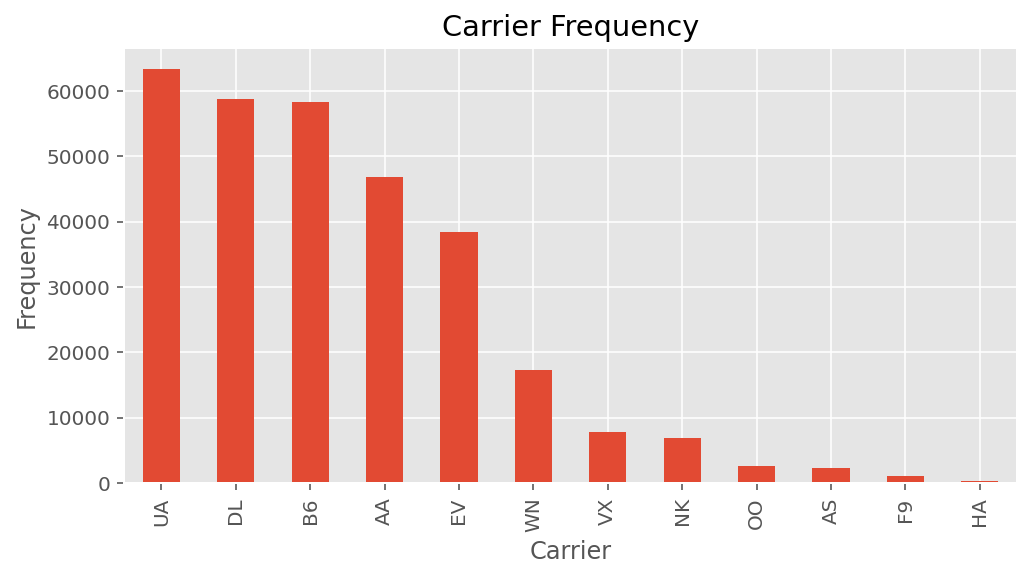

In [86]:
#counting the frequecies
count_carr=df['carrier'].value_counts()
#plot in a bar chart
#give it a title
count_carr.plot.bar(title='Carrier Frequency')
#assign axis labels
plt.xlabel("Carrier")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

The least frequent airline carriers are WN (South West), VX (Virgin America), NK (Spirit Wings), OO (Sky West), AS (Alaska), F9 (Frontier Airlines), and HA (Hawaiian).

The most frequent are UA (United), DL (Delta), B6 (Jet Blue), AA (American), and EV (Express Jet).

#### 8. Flight

In [87]:
#summary statistics
df['flight'].describe()

count    303748.000000
mean       1698.710668
std        1461.222263
min           1.000000
25%         519.000000
50%        1345.000000
75%        2238.000000
max        6988.000000
Name: flight, dtype: float64

With a few exceptions, flights are usually numbered based on their direction of travel. For example, north and eastbound flights are assigned even numbers, while south and westbound flights are numbered odd. This means they are categorical, even though they are assigned numbers. 

In [88]:
df['flight'].value_counts()

211     874
23      856
1161    854
1415    845
1105    824
       ... 
1316      1
352       1
6283      1
6499      1
2871      1
Name: flight, Length: 3383, dtype: int64

There are no null values in the flight column. There are 3,383 unique flight numbers in this dataset, with flight 211 appearing 874 times. 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

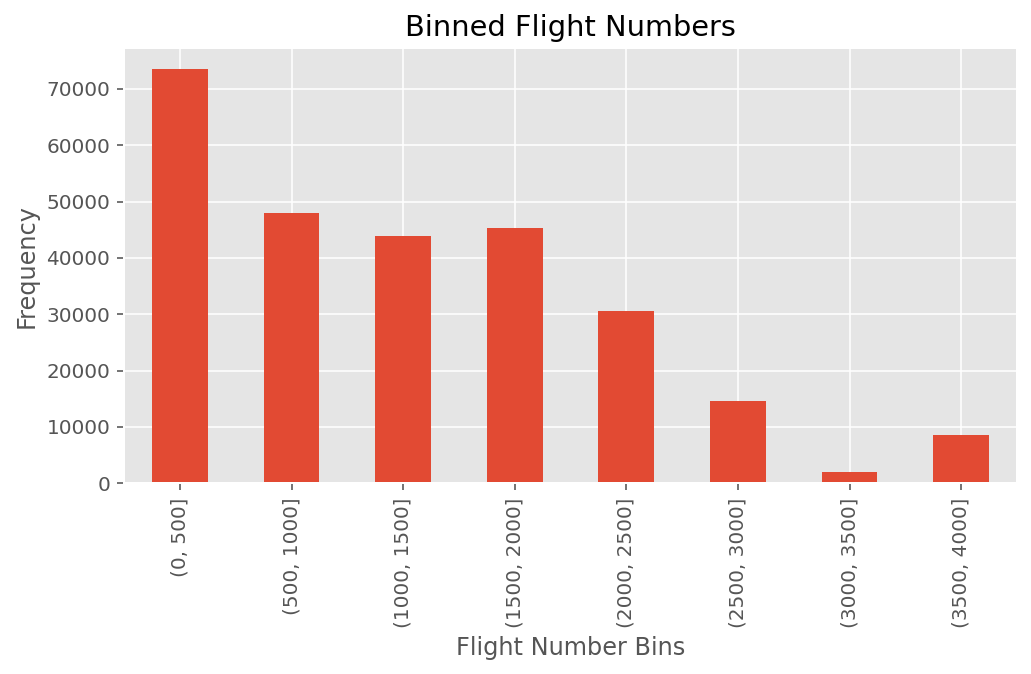

In [89]:
#create bins and value counts
bins3 = [0,500,1000,1500,2000,2500,3000,3500,4000]
df['binned3'] = np.searchsorted(bins1, df['flight'].values)
binning3 = pd.cut(df['flight'], bins=bins3).value_counts()
binning3 = df.groupby(pd.cut(df['flight'], bins=bins3)).size()

#plot in a chart
#give it a title
binning3.plot.bar(title='Binned Flight Numbers')
#assign axis labels
plt.xlabel("Flight Number Bins")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Most flight numbers fall between 0 and 500, but more research would need to be done to determine if and how a flight number is significant to a flight's times, origins, destinations, etc.

#### 9. Tail Number

In [90]:
#summary statistics
df['tailnum'].describe()

count     302757
unique      4126
top       N751EV
freq         471
Name: tailnum, dtype: object

There are 991 missing values from the tail number column. The most frequent tail number is N751EV at 471 appearances in the data set. Planes in the US must start with an "N". Then, the FAA numbering scheme can contain between one and five digits after the “N.” Lastly, customized letters can come after the numbers. For example 'N548AA' is an American plane with an FAA registration number of 548, and the plane belongs to American Airlines.

In [91]:
#count tailnum values
tn_vc=df['tailnum'].value_counts()
tn_vc

N751EV    471
N723EV    467
N391CA    457
N752EV    457
N758EV    453
         ... 
N302AS      1
N7APAA      1
N439SW      1
N866DA      1
N600WN      1
Name: tailnum, Length: 4126, dtype: int64

There are 4,126 unique tailnumbers. We will bin the occurences. For example, we will have a been of 0 to 25, and all the tail numbers that 25 times or less will go into that bin. We will get the frequency of each bin.

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

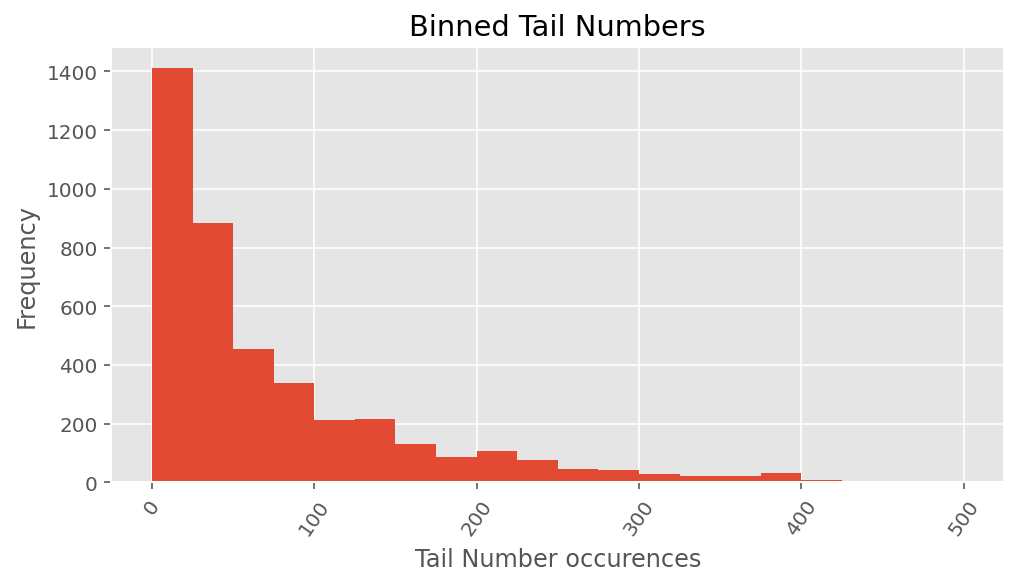

In [92]:
#create bins
bins_list_tn = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 
                325, 350, 375, 400, 425, 450, 475, 500]
#plot
tn_vc.plot.hist(title='Binned Tail Numbers', bins=bins_list_tn)
#assign axis labels
plt.xlabel("Tail Number occurences")
plt.ylabel("Frequency")
plt.xticks(rotation=55, horizontalalignment="center")

More analysis would need to be done to see if this variable would provide further useful information than what we could just get from the 'Carrier' variable. However, from the graph alone, we can see that the data is skewed right with most tail number occurences being less than 100. 

#### 10. Origin 

In [36]:
#summary statistics
df['origin'].describe()

count     303748
unique         3
top          EWR
freq      115968
Name: origin, dtype: object

There are just 3 NY airports for the origin - EWR, JFK, and LGA. The most frequent one here is EWR at 115,968 times. 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

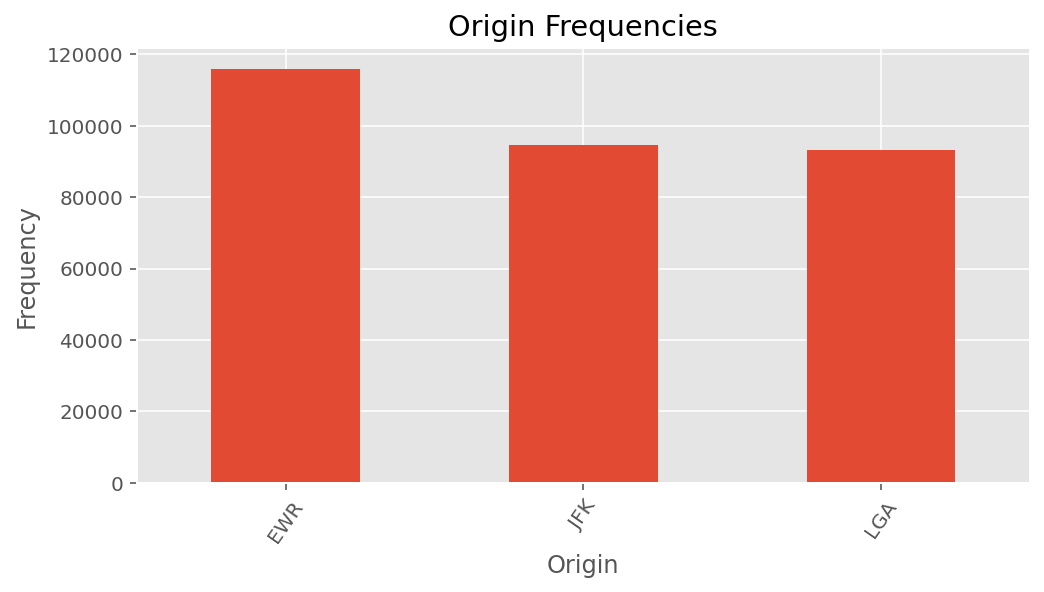

In [93]:
#counting the frequecies
count_or=df['origin'].value_counts()
#plot in a chart
#give it a title
count_or.plot.bar(title='Origin Frequencies')
#assign axis labels
plt.xlabel("Origin")
plt.ylabel("Frequency")
plt.xticks(rotation=55, horizontalalignment="center")

EWR is the most frequent origin, but not by far. JFK and LGA appear a similar amount of times. 

#### 11. Destination

In [95]:
#summary statistics
df['dest'].describe()

count     303748
unique       109
top          LAX
freq       18044
Name: dest, dtype: object

There are 109 unique destinations, LAX being the most frequent one in the data set with 18,044 times. 

In [99]:
df['dest'].value_counts()

LAX    18044
ATL    16845
ORD    16657
MCO    16543
BOS    15830
       ...  
ALB       72
MTJ       40
HDN       25
ILM       23
ANC       13
Name: dest, Length: 109, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

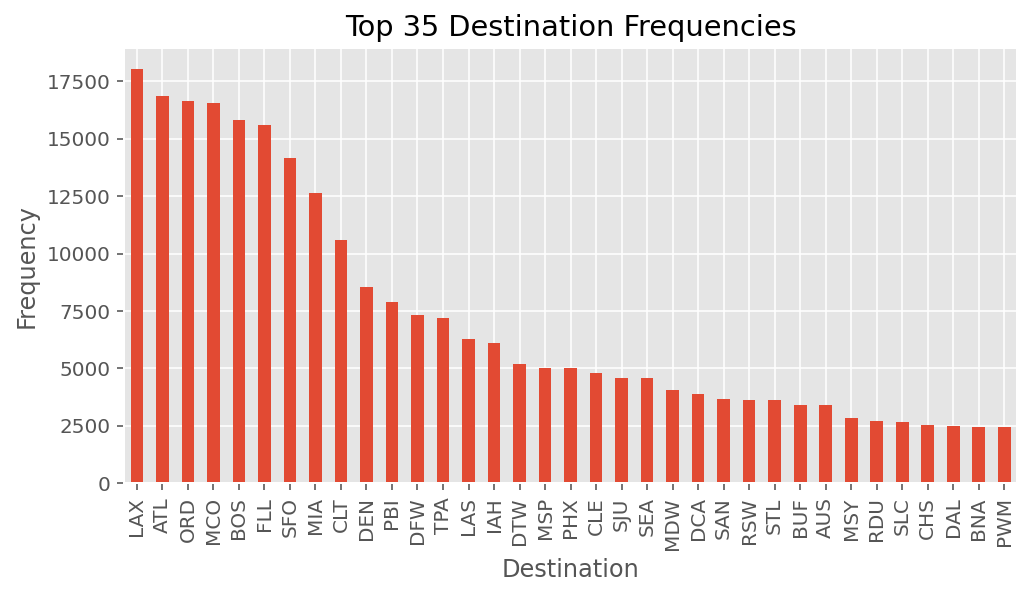

In [97]:
#counting the frequecies
count_dest=df['dest'].value_counts().head(35)
#plot in a chart
#give it a title
count_dest.plot.bar(title='Top 35 Destination Frequencies')
#assign axis labels
plt.xlabel("Destination")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

Frequency drop off begins around DEN's frequency (the 10th most frequent airport destination). 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

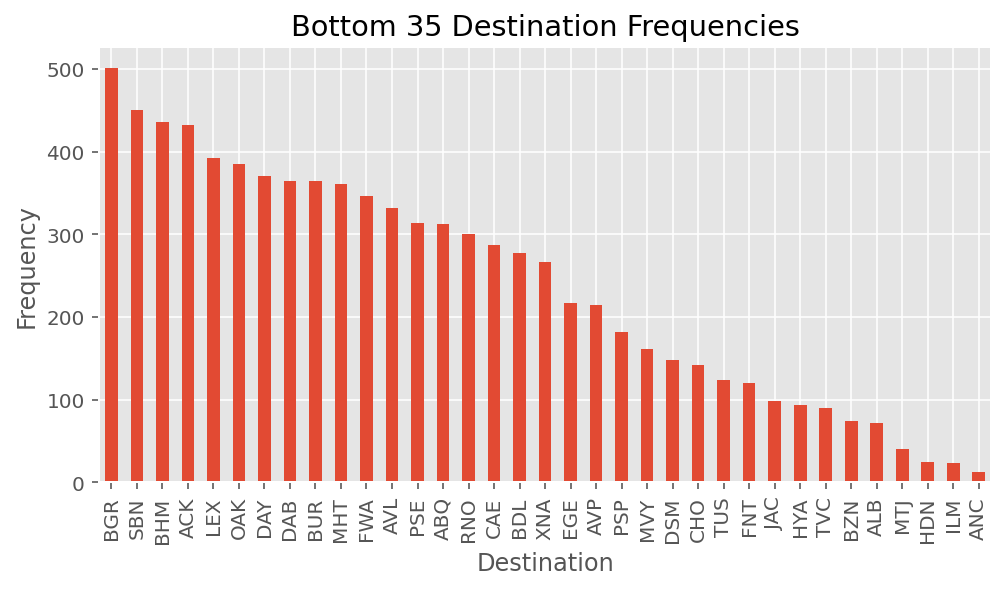

In [98]:
#counting the frequecies
count_dest_tail=df['dest'].value_counts().tail(35)
#plot in a chart
#give it a title
count_dest_tail.plot.bar(title='Bottom 35 Destination Frequencies')
#assign axis labels
plt.xlabel("Destination")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")

#### 12. Air Time

In [100]:
#summary statistics
df['air_time'].describe()

count    294896.000000
mean        164.489427
std          97.872896
min          20.000000
25%          99.000000
50%         139.000000
75%         211.000000
max         712.000000
Name: air_time, dtype: float64

The minimum air time is 20 minutes and the maximum time is 712 minutes (approx. 12 hours). The data has a standard deviation of 97.87 minutes and a mean of of 164.50 minutes. 

In [101]:
#import packages
from scipy.stats import probplot
from pandas.plotting import scatter_matrix



# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

def compare(col_name, title, xlabel, ylabel):
    """
    Plot three plots.
    """
    
    fig = plt.figure(figsize=(16,4))
    
    plt.subplot(1, 3, 1)
    plt.xlabel(xlabel)
    sns.distplot(df[col_name], kde=False);
    plt.title(title);
    plt.xlabel(xlabel)

    plt.subplot(1, 3, 2)
    probplot(df[col_name], plot = plt);
    string = title + " prob. plot"
    plt.title(string);

    plt.subplot(1, 3, 3)
    plt.ylabel(ylabel)
    df.boxplot(column = col_name);
    plt.title(title);

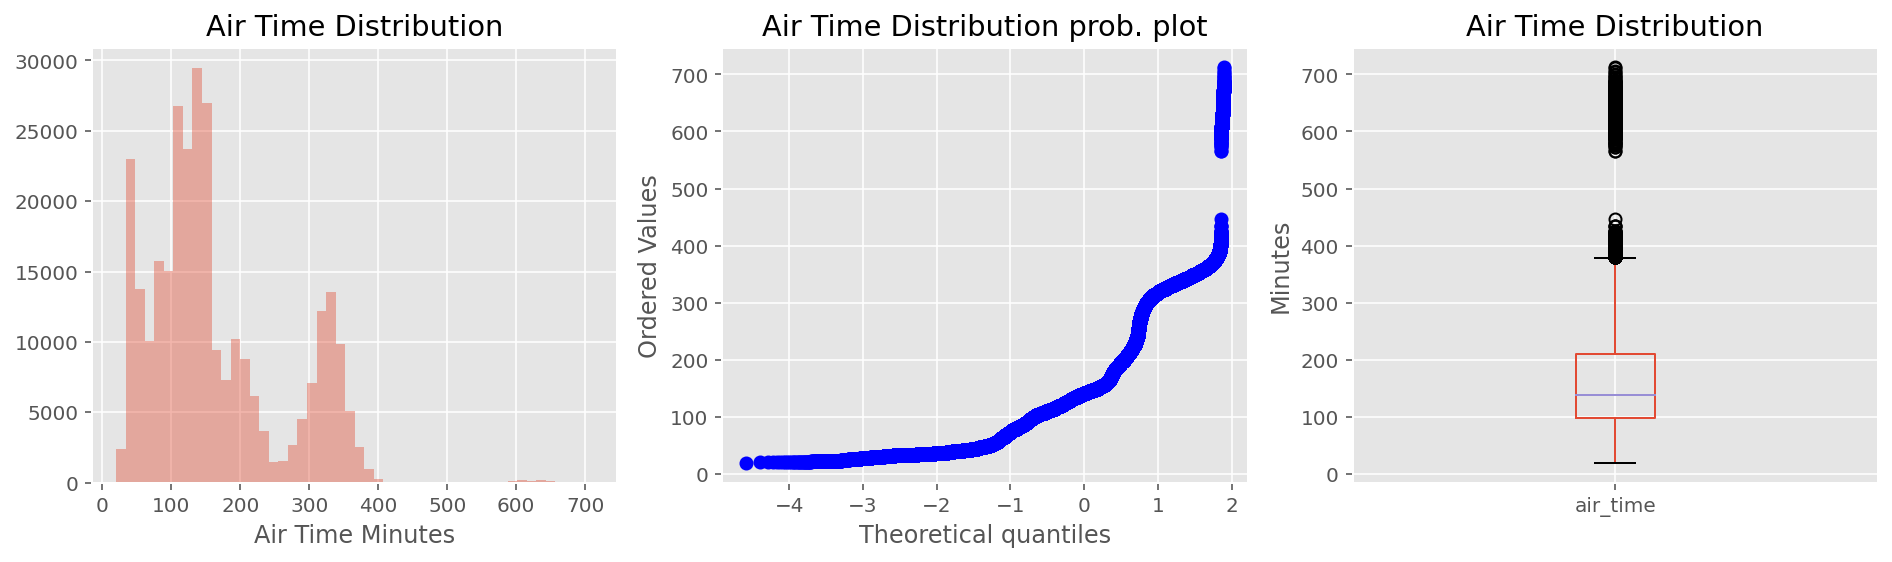

In [102]:
compare("air_time", "Air Time Distribution", 'Air Time Minutes', 'Minutes')

The data is skewed right, with many outliers. Many of the non outlier values lay between the 100 and 200 minute mark of air time.

#### 13. Distance 

In [45]:
#summary statistics
df['distance'].describe()

The longest distance is 4,983 miles and the shortest distance is 93 miles. The data has a standard deviation of 760.44 miles and a mean of 1,154.05 miles. 

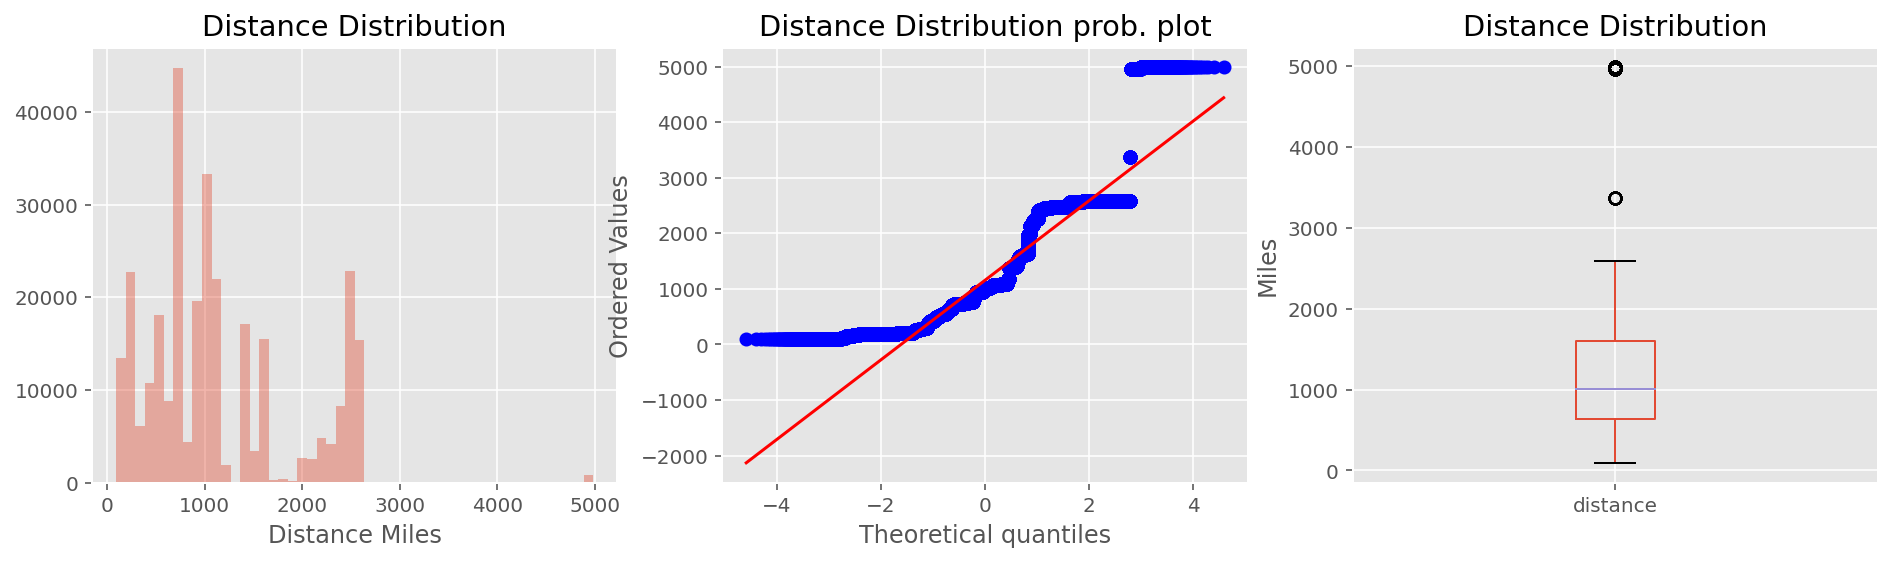

In [103]:
compare("distance", "Distance Distribution", 'Distance Miles', 'Miles')

Data appears to be decently normal, with a few major outliers near the 5,000 mile mark. 

#### 14. Departure Delay 

In [104]:
#summary statistics
df['dep_delay'].describe()

count    295934.000000
mean         15.187424
std          52.040383
min         -84.000000
25%          -6.000000
50%          -2.000000
75%          12.000000
max        1548.000000
Name: dep_delay, dtype: float64

The minimum "delay" is -84 minutes, meaning the flight departed 84 minutes before it was scheduled to. The maximum delay was 1,548 minutes. The data has a standard deviation of 52.04 delayed minutes and a mean of 15.19 delayed minutes. 

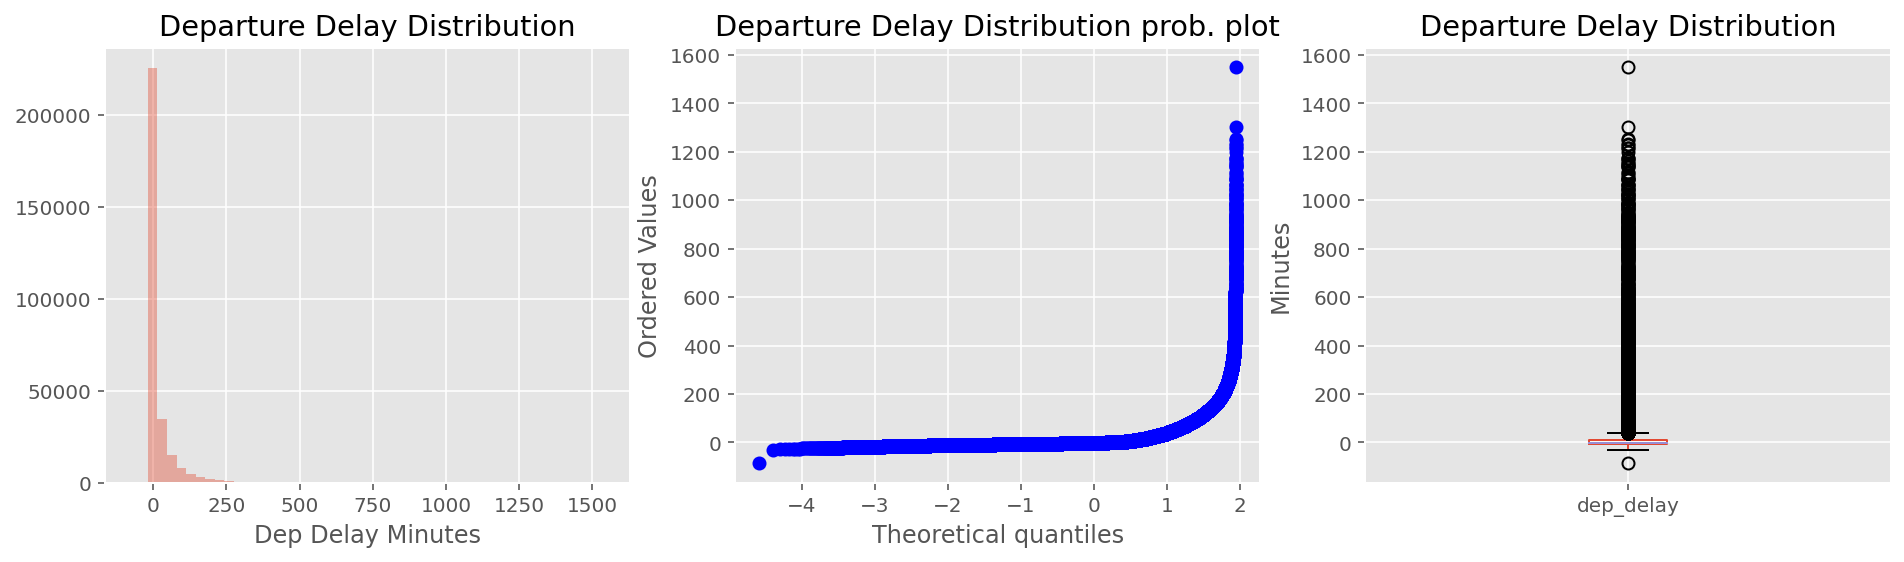

In [105]:
compare("dep_delay", "Departure Delay Distribution", 'Dep Delay Minutes', 'Minutes')

Data is skewed right. However, we would like to examine what is happening around the 0 mark in the histogram. 

(array([-22.5, -20. , -17.5, -15. , -12.5, -10. ,  -7.5,  -5. ,  -2.5,
          0. ,   2.5]),
 <a list of 11 Text major ticklabel objects>)

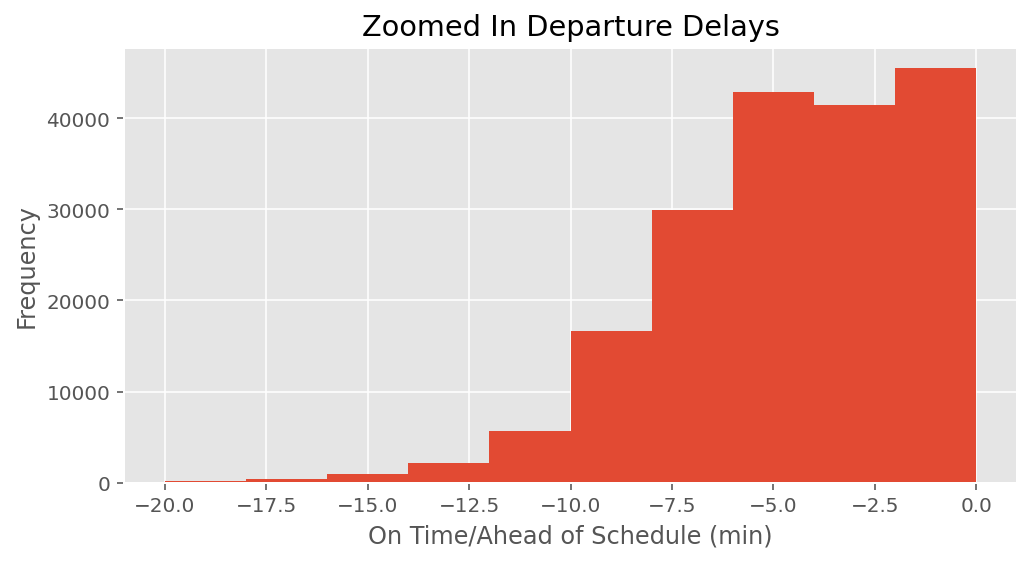

In [107]:
#create bins list
bins_list_dd = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0]

#graph
df['dep_delay'].plot.hist(title = 'Zoomed In Departure Delays', bins=bins_list_dd)
plt.xlabel("On Time/Ahead of Schedule (min)")
plt.ylabel("Frequency")
plt.xticks(rotation=0, horizontalalignment="center")


Many of the departure 'delays' are actually ahead of schedule. Specifically, lots are either on time or just 1-5 minutes early. 

#### 15. Arrival Delay

In [108]:
#summary statistics 
df['arr_delay'].describe()

count    294896.000000
mean          7.104023
std          55.323259
min         -98.000000
25%         -20.000000
50%          -7.000000
75%          13.000000
max        1589.000000
Name: arr_delay, dtype: float64

The minimum arrival "delay" is -98 minutes, meaning the flight arrived at the destination 98 minutes ahead of schedule. The maximum delay is 1,589 minutes. The data has a standard deviation of 55.32 arrival delay minutes and a mean of 7.10 arrival delay minutes. 

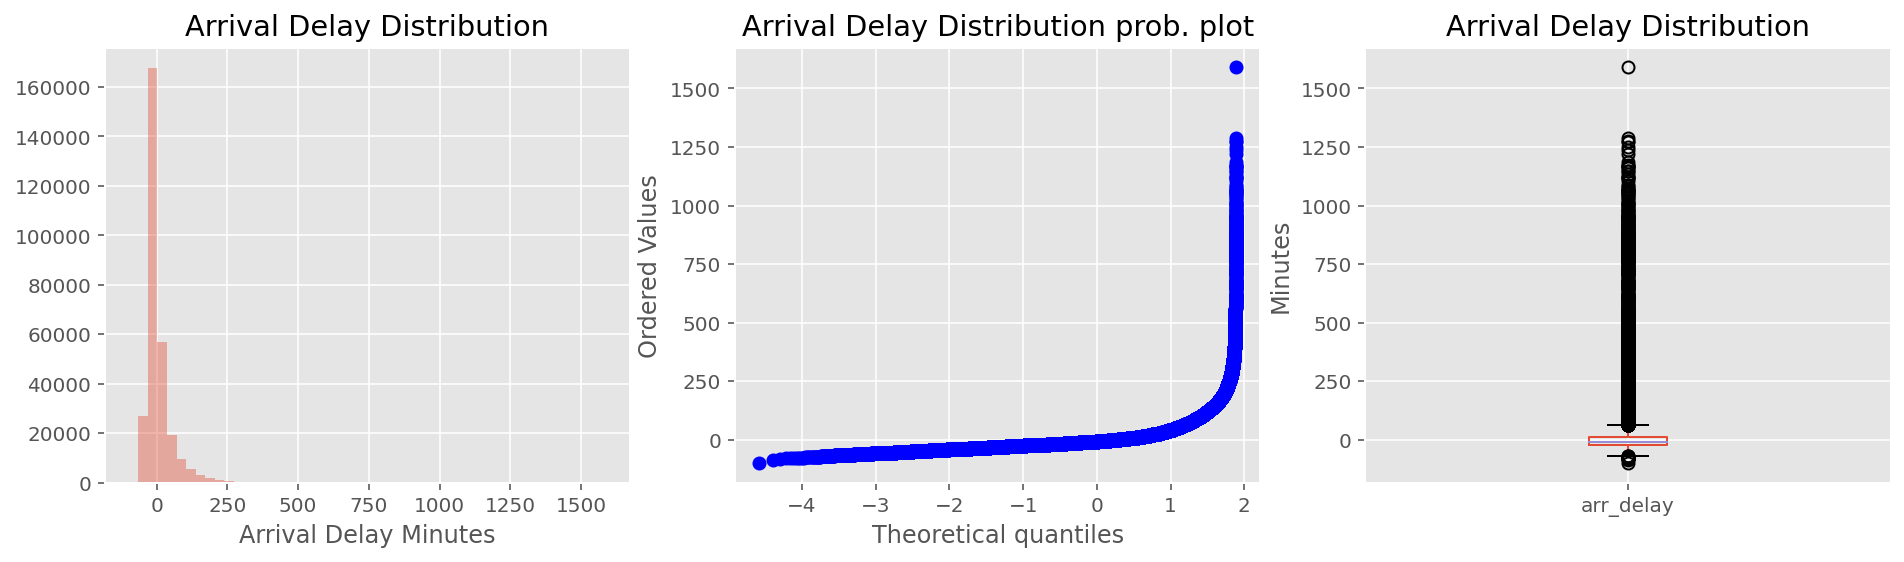

In [109]:
compare("arr_delay", "Arrival Delay Distribution", 'Arrival Delay Minutes', 'Minutes')

Data is skewed right.

(array([-80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.]),
 <a list of 10 Text major ticklabel objects>)

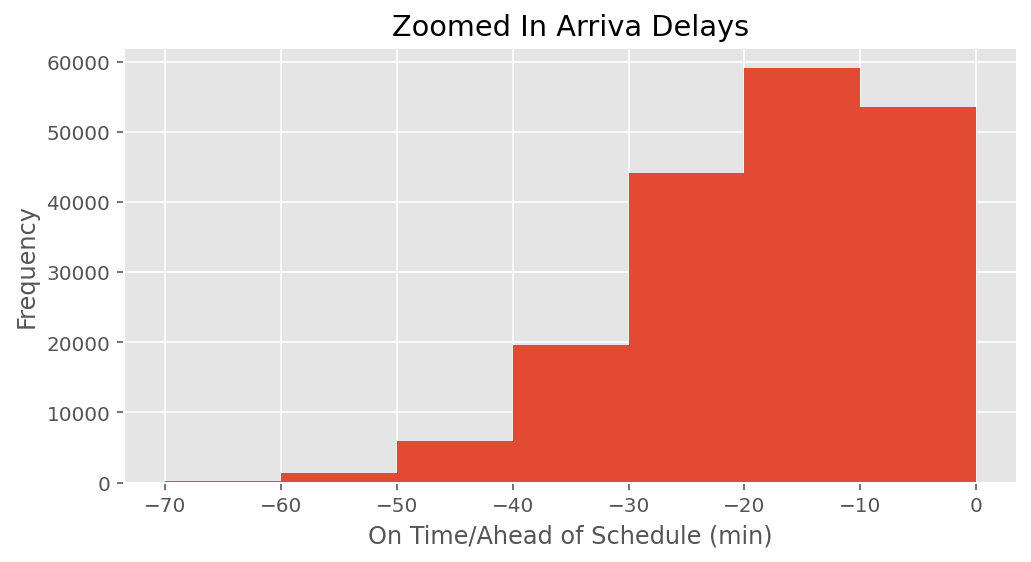

In [110]:
#create bins
bins_list_arr = [-70,-60,-50,-40,-30,-20,-10,0]

#graph
df['arr_delay'].plot.hist(title = 'Zoomed In Arriva Delays',bins=bins_list_arr)
plt.xlabel("On Time/Ahead of Schedule (min)")
plt.ylabel("Frequency")
plt.xticks(rotation=0, horizontalalignment="center")

Many flights arrive ahead of schedule. 

## Departure Delays Over Time

In [111]:
#delays over time (months) prep

#convert 'time_hour' column to datetime type
df['time_hour'] = pd.to_datetime(df['time_hour'])

#create columns of 'Dates' and 'Hours' from 'time_hour' column
df['Dates'] = pd.to_datetime(df['time_hour'], format='%Y:%M:%D').dt.date
df['Hours'] = pd.to_datetime(df['time_hour'], format='%Y:%M:%D').dt.time

#create sub df of df1, summing variables and grouping by 'month'
df1=df.groupby('month').sum()

#make x is dep_delay series of df1
x=df1['dep_delay']

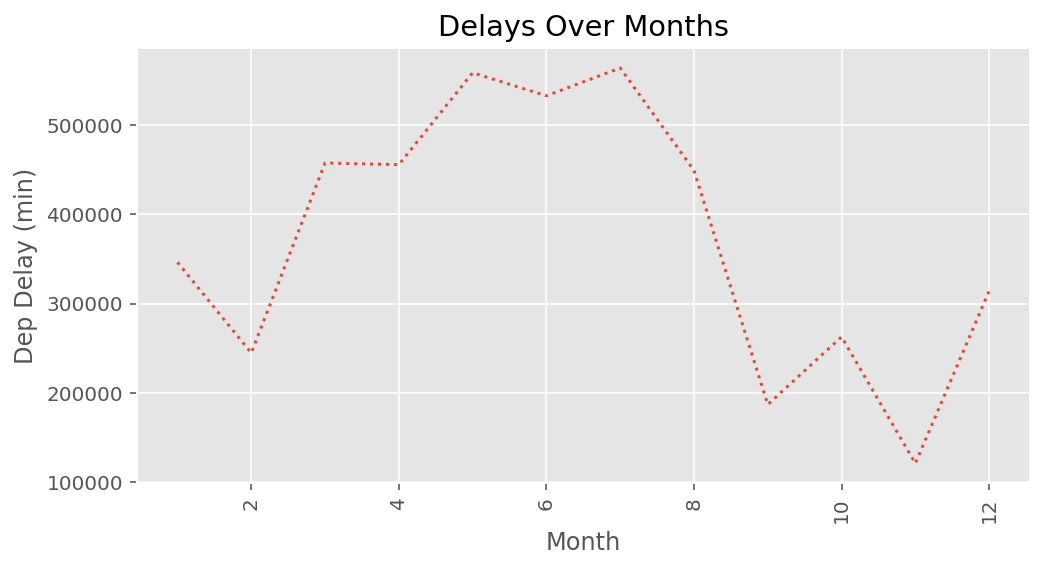

In [112]:
#plot line graph - show summed monthly departure delays
plt.plot(x,linestyle = 'dotted')
#assign axis labels
plt.xlabel("Month")
plt.ylabel("Dep Delay (min)")
plt.title('Delays Over Months')
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

## NOAA Data:

Our second dataset comes from the National Oceanic Atmospheric Administration Climate database. It is weather conditions for each day of 2017, focused on the areas of EWR, LGA, and JFK.

In [113]:
#bring data into df
df_noaa=pd.read_csv('https://raw.githubusercontent.com/MarlaGoodman/CMS-Project/main/weather_noaa.csv')

#take away calculated columns
df_noaa.drop(['Precip_bool','new_snow_bool','rain_bool'],axis=1,inplace=True)

In [114]:
#show partial df_noaa
df_noaa.head()

,Date,Precip,New Snow
0,1/1/2017,T,0
1,1/2/2017,0.31,T
2,1/3/2017,0.46,0
3,1/4/2017,T,0
4,1/5/2017,T,T


"In meteorology, the word "trace" is used to describe a very small amount of precipitation that results in no measurable accumulation. In other words, a 'trace' is when you can observe that some amount of rain or snow fell, but it was not enough to be measured using a rain gauge, snow stick, or any other weather instrument.

Since trace precipitation falls as very light and brief sprinkles or flurries, you often won't know it unless you happen to be outdoors and see or feel it falling. 

Trace amounts of precipitation are abbreviated by the capital letter "T", often placed in parenthesis (T).
If you must convert a trace to a numerical amount, it would equal 0.00.

It's logical to think that if you add up enough tiny amounts of water you will eventually end up with a measurable amount. This is not so with precipitation. No matter how many traces you add together, the sum will never be more than a trace."

-Oblack, Rachelle. "What Is a "Trace" of Precipitation?" ThoughtCo, Aug. 26, 2020, thoughtco.com/what-is-trace-of-precipitation-3444238.

Based on Oblack's explanation of 'T', we will replace all T's in our dataset with 0. 

In [115]:
#replace all 'T's in df with 0
df_new=df_noaa.replace(to_replace ="T",value ="0")
df_new

,Date,Precip,New Snow
0,1/1/2017,0,0
1,1/2/2017,0.31,0
2,1/3/2017,0.46,0
3,1/4/2017,0,0
4,1/5/2017,0,0
...,...,...,...
360,12/27/2017,0,0
361,12/28/2017,0,0
362,12/29/2017,0,0
363,12/30/2017,0.03,0.6


In [116]:
#change variables to floats
df_new['Precip'] = df_new['Precip'].astype(float)
df_new['New Snow'] = df_new['New Snow'].astype(float)

### EDA: Variable Precip

In [117]:
#summary statistics 
df_new['Precip'].describe()

count    365.000000
mean       0.118110
std        0.334508
min        0.000000
25%        0.000000
50%        0.000000
75%        0.030000
max        2.840000
Name: Precip, dtype: float64

There are 365 counts here (corresponding to daily weather conditions for 2017). The mean precipitation is .118 inches and the standard deviation is .33 inches

(array([318.,  24.,   9.,   5.,   2.,   1.,   4.,   1.,   0.,   1.]),
 array([0.   , 0.284, 0.568, 0.852, 1.136, 1.42 , 1.704, 1.988, 2.272,
        2.556, 2.84 ]),
 <a list of 10 Patch objects>)

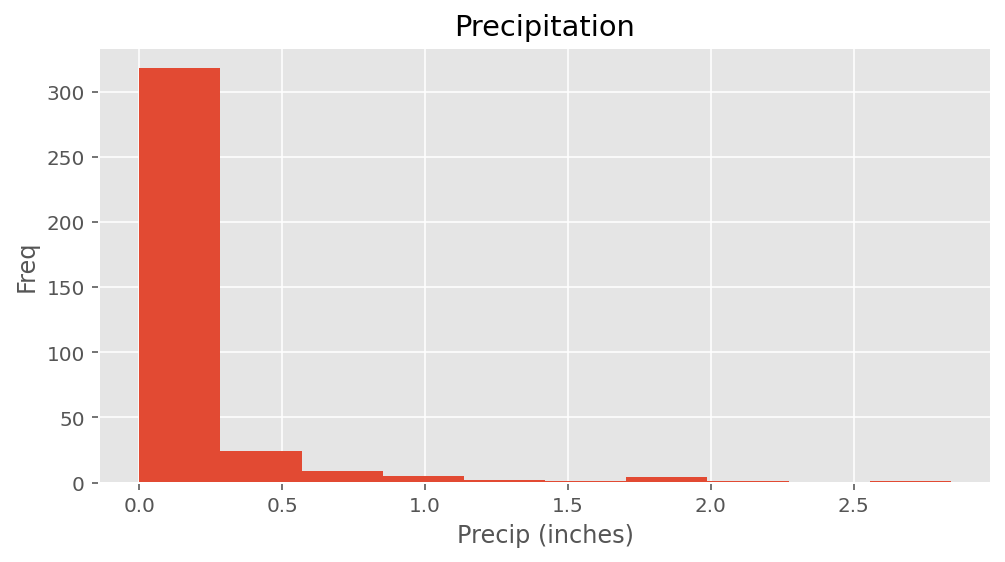

In [120]:
#graph 'precip'
fig1, ax1 = plt.subplots()
ax1.set_title('Precipitation')
plt.xlabel("Precip (inches)")
plt.ylabel("Freq")
ax1.hist(df_new['Precip'])

Most precipitation occurences are inches between 0 and .5, with higher values around the 2.0 and 2.5 marks. The data is skewed to the right due to outliers. Let's now zoom into the tall column:

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12]),
 <a list of 8 Text major ticklabel objects>)

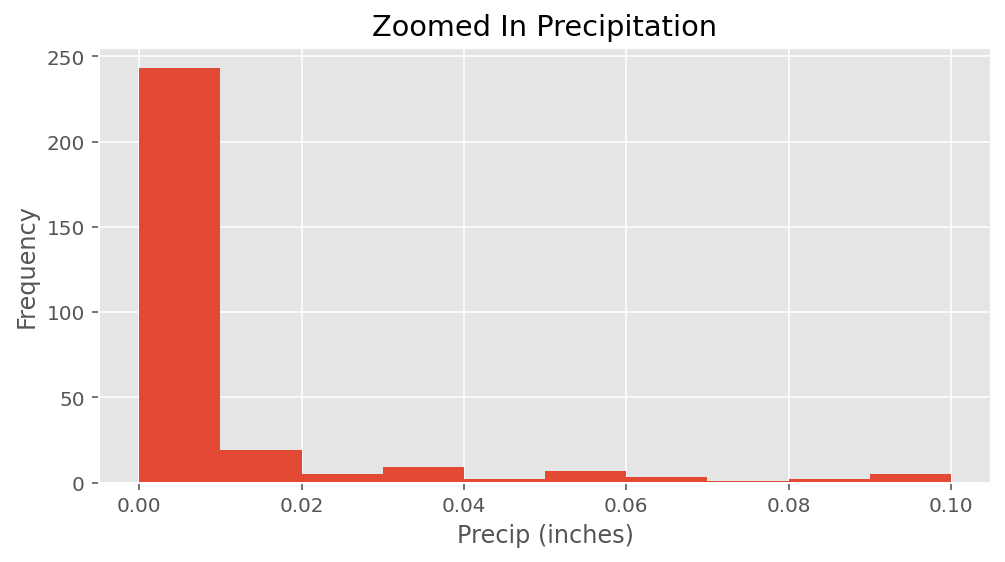

In [121]:
#zoom into graph
bins_precip = [0,.01,.02,.03,.04,.05,.06,.07,.08,.09,.1]

#graph
df_new['Precip'].plot.hist(title = 'Zoomed In Precipitation',bins=bins_precip)
plt.xlabel("Precip (inches)")
plt.ylabel("Frequency")
plt.xticks(rotation=0, horizontalalignment="center")

Most days have a precipitation of 0 or .01 inches. Some other days have rainfalls of .02 through .10

### EDA: Variable Snow

In [122]:
#summary statistics 
df_new['New Snow'].describe()

count    365.000000
mean       0.093973
std        0.713039
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.300000
Name: New Snow, dtype: float64

There are 365 counts here (corresponding to daily weather conditions for 2017). The mean snow amount is .09 inches and the standard deviation is .71 inches

(array([356.,   3.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   2.]),
 array([0.  , 0.83, 1.66, 2.49, 3.32, 4.15, 4.98, 5.81, 6.64, 7.47, 8.3 ]),
 <a list of 10 Patch objects>)

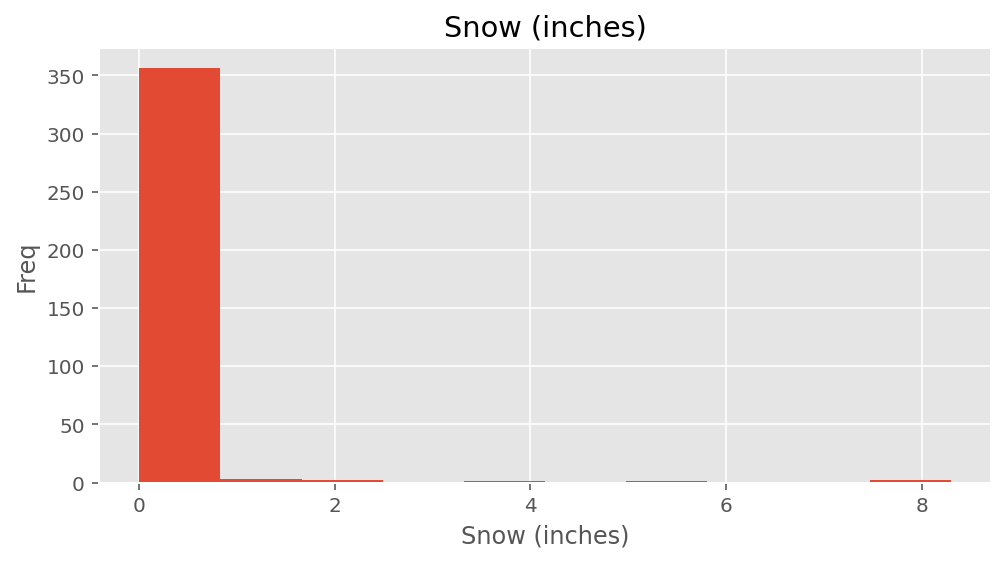

In [124]:
#graph 
fig2, ax1 = plt.subplots()
ax1.set_title('Snow (inches)')
plt.xlabel("Snow (inches)")
plt.ylabel("Freq")
ax1.hist(df_new['New Snow'])

Most snowfalls resulted in 0 - 1 inches. There are some outliers where there was 4 - 8 inches of snow. Let's examine the tall column below:

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16]),
 <a list of 10 Text major ticklabel objects>)

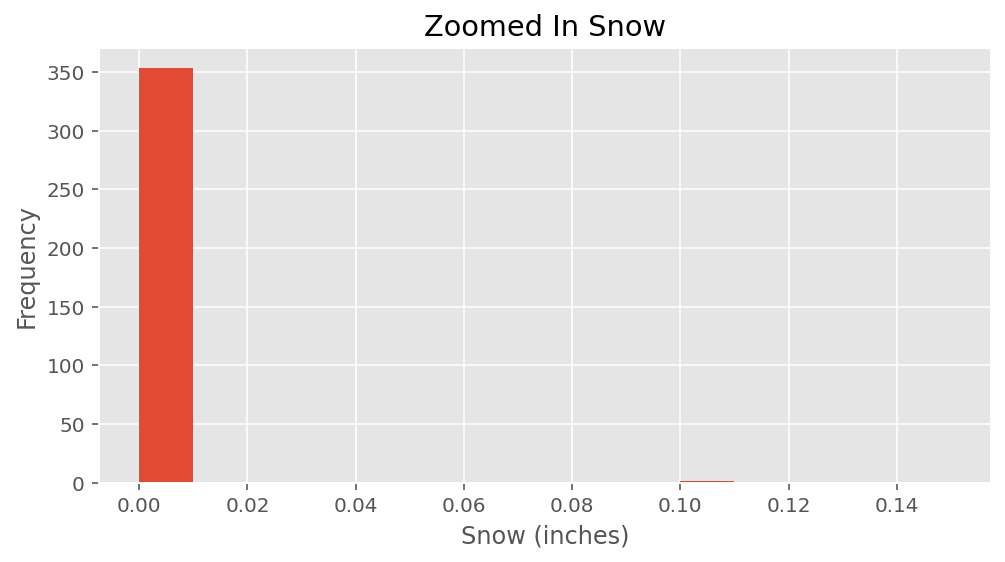

In [125]:
#zoom into graph
bins_snow = [0,.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.11,.12,.13,.14,.15]
df_new['New Snow'].plot.hist(title ='Zoomed In Snow',bins=bins_snow)
plt.xlabel("Snow (inches)")
plt.ylabel("Frequency")
plt.xticks(rotation=0, horizontalalignment="center")

Most values here (except for one at the .10 mark) are 1/100 (0.01) of an inch of rain/snow. .01 is the first measurable amount of precipitation reported by The National Weather Service. This would not leave puddles on the ground and would slightly wet the surface. This might occur during a light shower for 2-5 minutes or even a rain drizzle for 2 hours.

- https://weatherins.com/rain-guidelines/